⏳ Training XGBoost model...
✅ Training completed in 2.98 seconds


C:\Users\spres\AppData\Roaming\Python\Python313\site-packages\xgboost\core.py:729: UserWarning: [01:23:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


📊 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96    394179
           1       0.13      0.19      0.15     13794

    accuracy                           0.93    407973
   macro avg       0.55      0.57      0.56    407973
weighted avg       0.94      0.93      0.94    407973



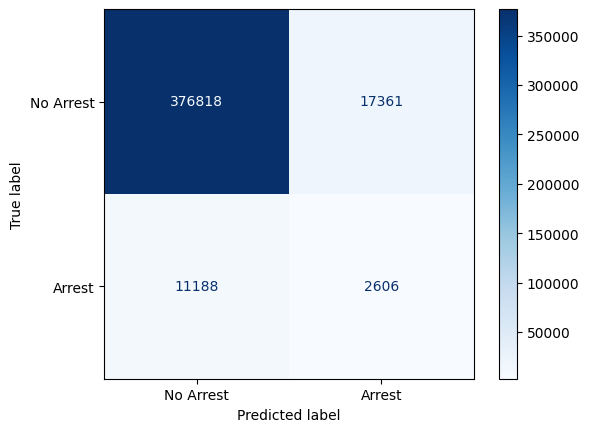

In [ ]:
import time
import joblib
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from xgboost import XGBClassifier

# Load data
X_train = joblib.load('X_train_contextual.pkl')
X_test = joblib.load('X_test_contextual.pkl')
y_train = joblib.load('y_train_contextual.pkl')
y_test = joblib.load('y_test_contextual.pkl')
preprocessor = joblib.load('preprocessor_contextual.pkl')

# Build XGBoost model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        device='cuda',
        tree_method='hist',
        n_estimators=100,
        max_depth=7,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        scale_pos_weight=10,
        eval_metric='logloss',
        random_state=42,
        verbosity=1
    ))
])

# Train model
print("Training XGBoost model...")
start = time.time()
model.fit(X_train, y_train)
end = time.time()
print(f"Training completed in {end - start:.2f} seconds")

# Evaluate
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=["No Arrest", "Arrest"], cmap='Blues'
)
